        Date        Asset   Price
0 2023-07-10       Bond B  385.64
1 2023-03-03      Stock B  297.20
2 2023-09-13       Bond B   75.98
3 2023-01-07       Bond B  356.34
4 2023-06-04      Stock A  260.05
5 2023-04-02       Bond B   65.51
6 2023-01-14  Commodity A  486.32
7 2023-08-17  Commodity A  477.10
8 2023-03-27      Stock A  280.81
9 2023-05-13      Stock B   92.15
Asset       Date  Bond A  Bond B  Commodity A  Stock A  Stock B
0     2023-01-02     NaN     NaN          NaN   172.15      NaN
1     2023-01-03  198.61     NaN       453.23   488.57      NaN
2     2023-01-04  142.24     NaN          NaN      NaN      NaN
3     2023-01-05     NaN     NaN       163.77      NaN      NaN
4     2023-01-07     NaN  356.34       420.42      NaN      NaN
..           ...     ...     ...          ...      ...      ...
262   2023-12-26     NaN  171.04       286.83      NaN      NaN
263   2023-12-28  444.94  158.85          NaN      NaN      NaN
264   2023-12-29  456.69     NaN          NaN     

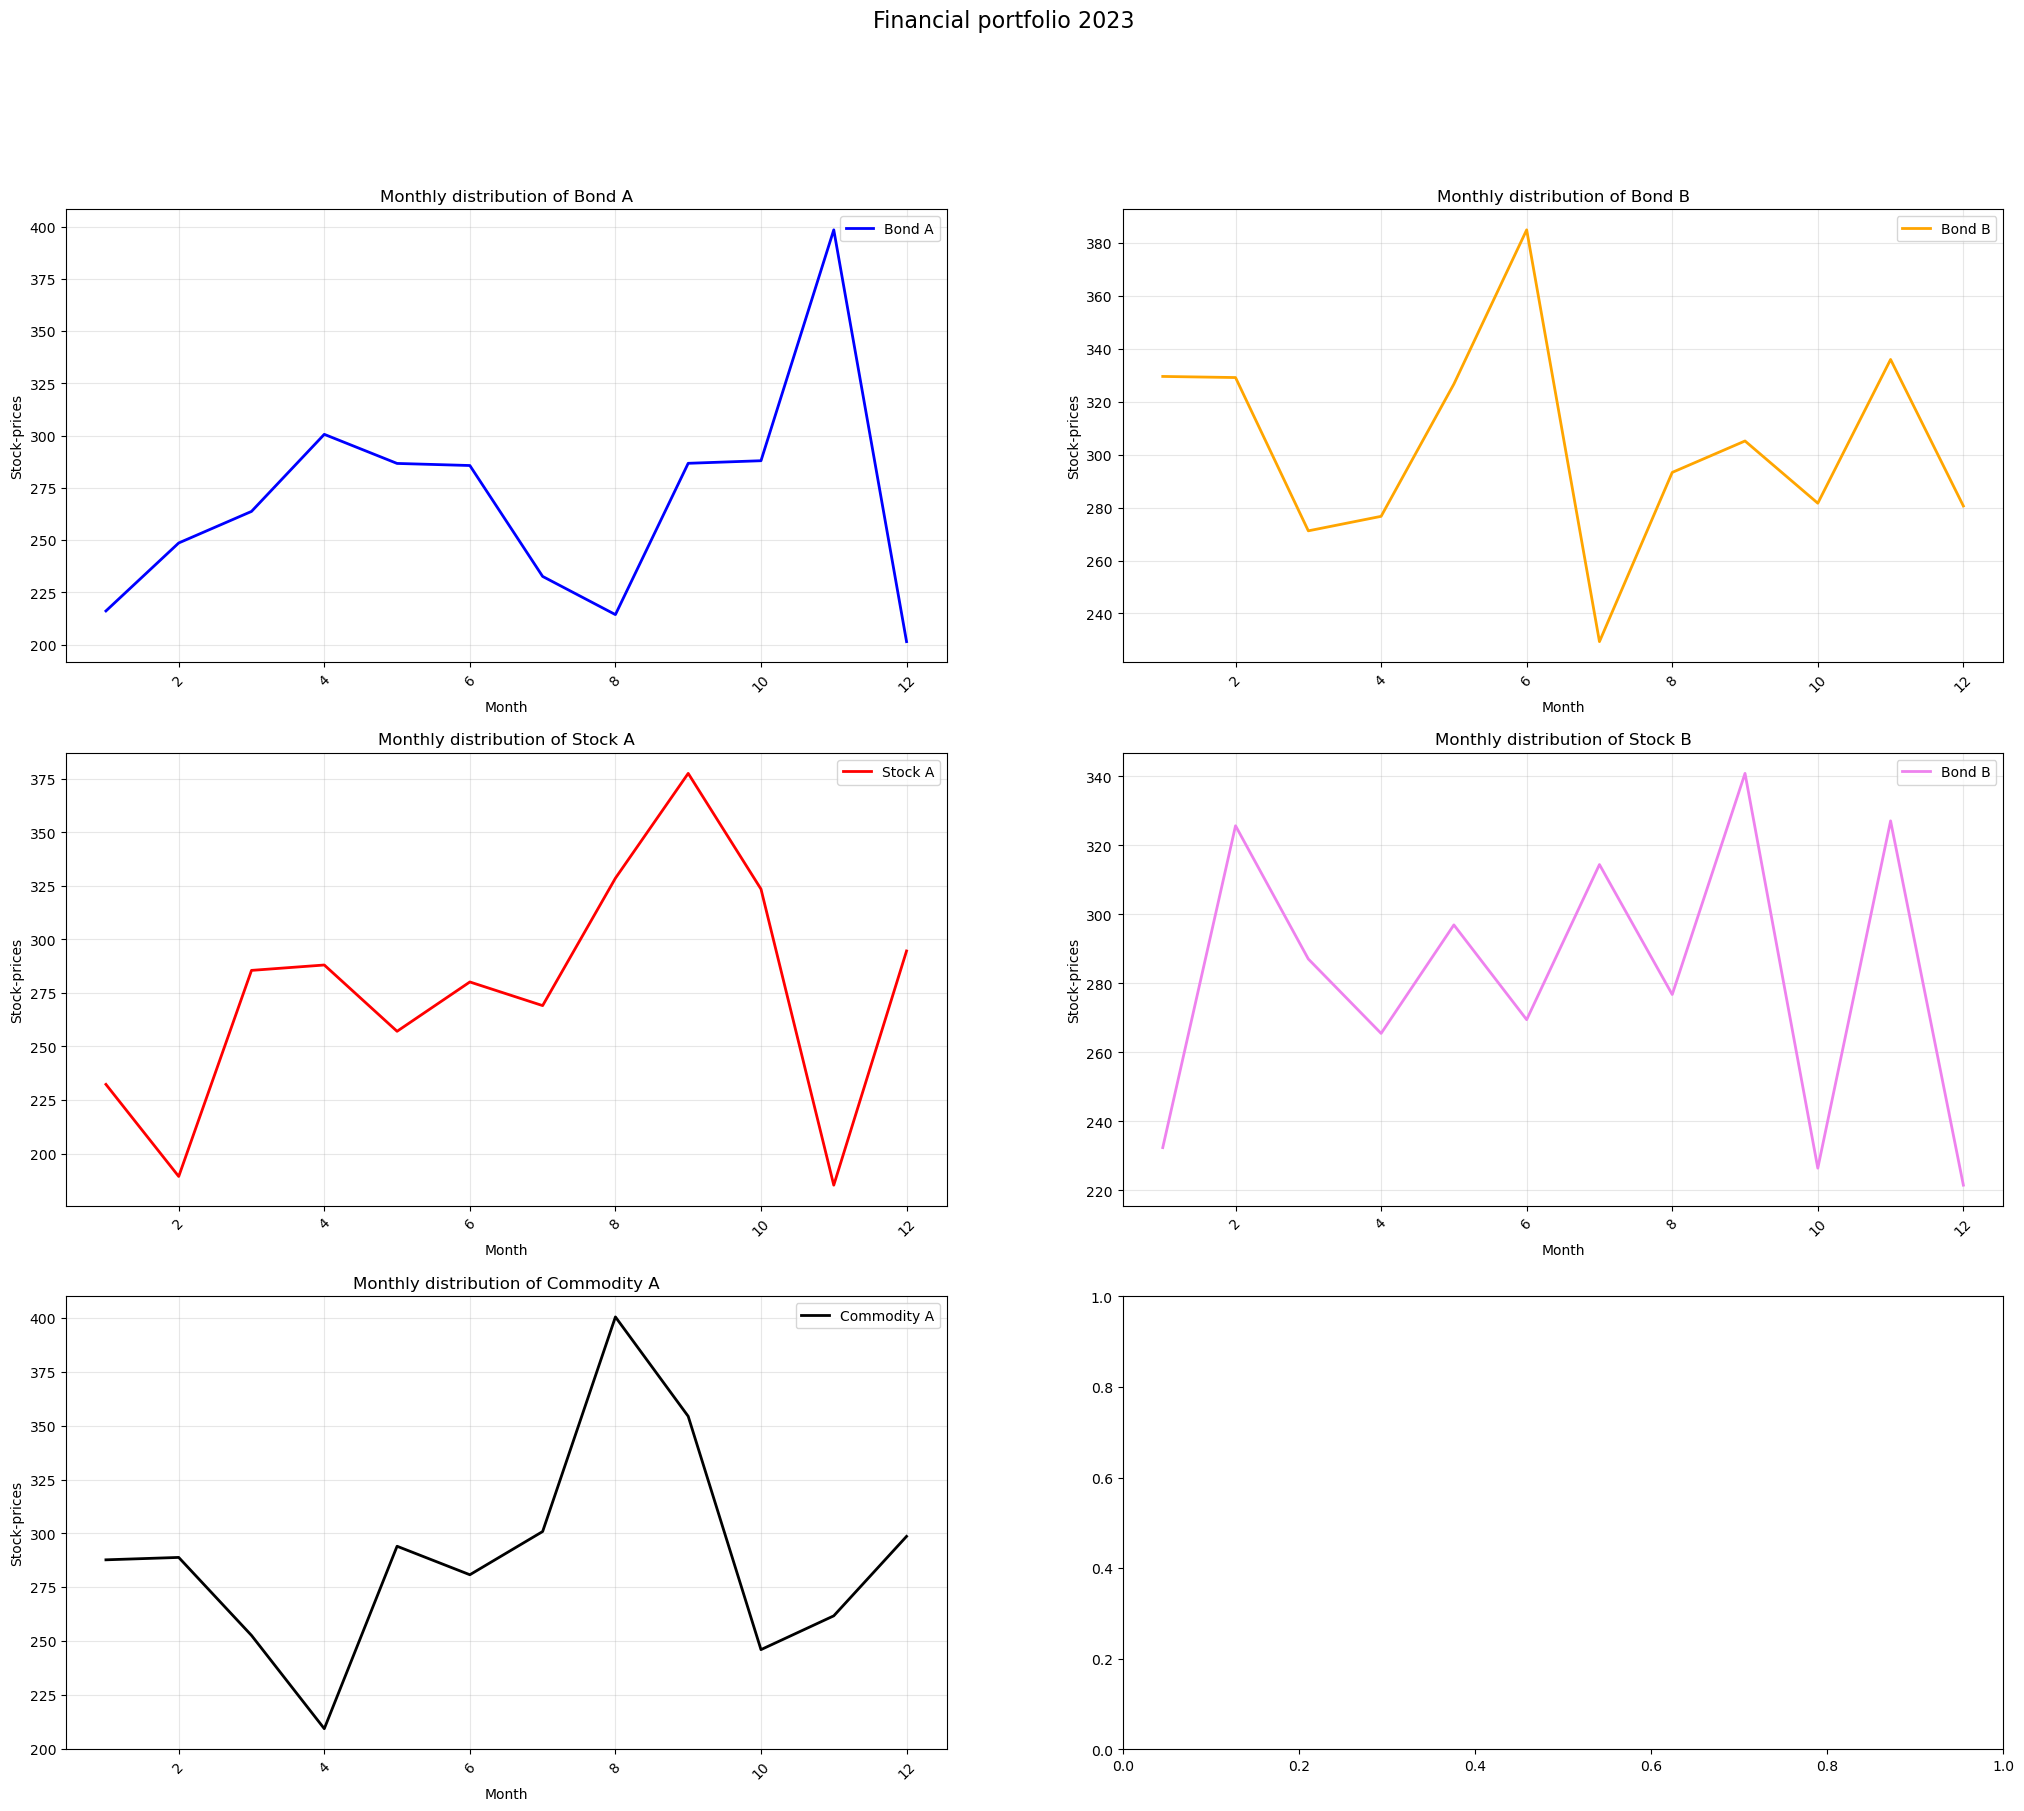

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Data extraction
stock_data1=pd.read_csv('financial_portfolio_data.csv')
stock_data1['Date']=pd.to_datetime(stock_data1['Date'])
print(stock_data1.head(10))

#Data preprocessing and manipulation
pivot_df = stock_data1.pivot_table(index='Date', columns="Asset", values="Price")
pivot_copy=pivot_df.reset_index()
print(pivot_copy)
pivot_copy['Month']=pivot_copy['Date'].dt.month
print(pivot_copy)
monthy_distribution=pivot_copy.groupby('Month').mean()
monthy_distribution=monthy_distribution.reset_index()
print(monthy_distribution.head())

#data visualization

fig, axes = plt.subplots(3, 2, figsize=(25, 20))
#ax1=fig1.add_axes([0,0,1,1])
#ax2=fig2.add_axes([0,0,1,1])
axes[0,0].plot(monthy_distribution['Month'],monthy_distribution['Bond A'],label='Bond A',color='blue',linewidth=2)
axes[0,1].plot(monthy_distribution['Month'],monthy_distribution['Bond B'],label='Bond B',color='orange',linewidth=2)
axes[1,0].plot(monthy_distribution['Month'],monthy_distribution['Stock A'],label='Stock A',color='red',linewidth=2)
axes[1,1].plot(monthy_distribution['Month'],monthy_distribution['Stock B'],label='Bond B',color='violet',linewidth=2)
axes[2,0].plot(monthy_distribution['Month'],monthy_distribution['Commodity A'],label='Commodity A',color='black',linewidth=2)

#add grids

axes[0,0].grid(alpha=0.3)
axes[0,1].grid(alpha=0.3)
axes[1,0].grid(alpha=0.3)
axes[1,1].grid(alpha=0.3)
axes[2,0].grid(alpha=0.3)

# Rotating month labels for better readability
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,1].tick_params(axis='x', rotation=45)
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,1].tick_params(axis='x', rotation=45)
axes[2,0].tick_params(axis='x', rotation=45)

#legend
axes[0,0].legend()
axes[0,1].legend()
axes[1,0].legend()
axes[1,1].legend()
axes[2,0].legend()

#title
axes[0, 0].set_title('Monthly distribution of Bond A')
axes[0, 1].set_title('Monthly distribution of Bond B')
axes[1, 0].set_title('Monthly distribution of Stock A')
axes[1, 1].set_title('Monthly distribution of Stock B')
axes[2, 0].set_title('Monthly distribution of Commodity A')

#x-axis
axes[0, 0].set_xlabel('Month')
axes[0, 1].set_xlabel('Month')
axes[1, 0].set_xlabel('Month')
axes[1, 1].set_xlabel('Month')
axes[2, 0].set_xlabel('Month')

#y-axis
axes[0, 0].set_ylabel('Stock-prices')
axes[0, 1].set_ylabel('Stock-prices')
axes[1, 0].set_ylabel('Stock-prices')
axes[1, 1].set_ylabel('Stock-prices')
axes[2, 0].set_ylabel('Stock-prices')

#add a super title
fig.suptitle("Financial portfolio 2023",fontsize=16)

plt.tight_layout
plt.show()
